<a href="https://colab.research.google.com/github/anomishra/Techademy_Artificial_intelligence/blob/master/ML_Models/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Y = mx + b**;
Calculate m and b to predict Y

### Importing all Needed packages or modules
If any package is not available then use command " !pip install package_name "

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#Importing data
Upload the data if present offline \\
**Data Source:** https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [0]:
data = pd.read_csv('FuelConsumption.csv')


Data uploaded to google colab 

In [0]:
data.head() # only initial dataframe not all data points will be printed

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Understanding the Data

This datasetcontains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Below are the variables present in the data.
Can you say the dependent variable

- *MODELYEAR* e.g. 2014
- *MAKE* e.g. Acura
- *MODEL* e.g. ILX
- *VEHICLE CLASS* e.g. SUV
- *ENGINE SIZE* e.g. 4.7
- *CYLINDERS* e.g 6
- *TRANSMISSION* e.g. A6
- *FUEL CONSUMPTION in CITY(L/100 km)* e.g. 9.9
- *FUEL CONSUMPTION in HWY (L/100 km)* e.g. 8.9
- *FUEL CONSUMPTION COMB (L/100 km)* e.g. 9.2
- *CO2 EMISSIONS (g/km)* e.g. 182   --> low --> 0

## Data Exploration
Lets describe the data, i.e., check more about the data. \\
Generally, if we find any missing values or corrupted data, we perform certain operations based on what is needed. \\
In this course, we will only use perfect data.

.describe() function used to summarize the whole dataset

In [0]:
# Explain what do see here.
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


It's quite possible to understand the data from above, but when complex data form is given then visualization is the best way to understand briefly about the data.

<function matplotlib.pyplot.show>

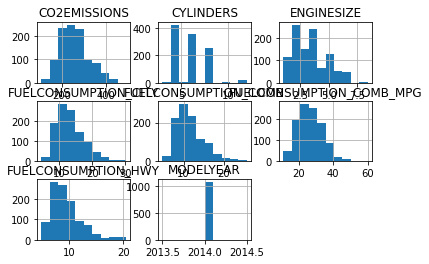

In [0]:
var = data[['MODELYEAR','MAKE','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
var.hist()
plt.show


#Relationship between variables
To create a model, finding relationship between variables is important. Generally, this is how you chose for independent variables. We will again use visualization to check this.

<function matplotlib.pyplot.show>

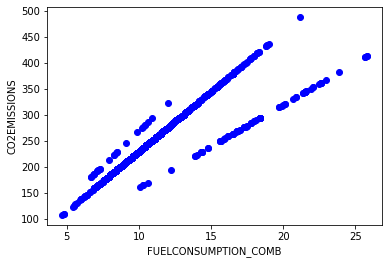

In [0]:
# lets see the relationship of variables

plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'],  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB") #FUEL CONSUMPTION COMB (L/100 km)
plt.ylabel("CO2EMISSIONS")
plt.show

**What do you find here?**

<function matplotlib.pyplot.show>

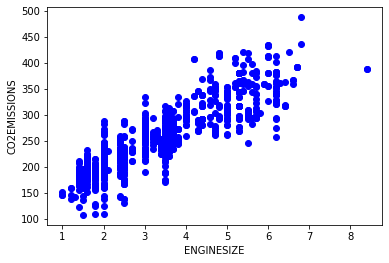

In [0]:
#Check for another
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'],  color='blue')
plt.xlabel("ENGINESIZE") #ENGINESIZE
plt.ylabel("CO2EMISSIONS")
plt.show

**What do you see here?**

In-class Assignmnet: \\
Plot __CYLINDER__ vs the Emission, to check the relationship.

#### Splitting train and test dataset
**80% : 20%**
This involves splitting the dataset into training and testing sets respectively. After which, you train with the training set and test with the testing set. 

 

In [0]:
#using sklearn module
import numpy as np
from sklearn.model_selection import train_test_split

#creating array of dependent and independent array
#reshaping them in (-1,1) for passing the inputs onebyone.

X=np.asarray(data['ENGINESIZE']).reshape(-1,1)
Y=np.asarray(data['CO2EMISSIONS']).reshape(-1,1)
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

**In-class activity:**
Plot the training data distribution and testing data distribution plot separatly.
Hint: Use relationship b/w variables plot

In [0]:
plt.scatter(fillhere, fillhere,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Now lets create the ML or Linear regression model using sklearn module. \\
In training, the best line of fit is found. __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line.  The will used further for testing or prediction.

In [0]:
# TRAINING
from sklearn.linear_model import LinearRegression 

#Building the model/program as 'lm'
lm = LinearRegression()
lm.fit(X_train, y_train)  # creating the best line of fit

# The coefficients
print ('Coefficients: ', lm.coef_) # m 
print ('Intercept: ',lm.intercept_) # b

Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]


Let's plot the line of fit

Text(0, 0.5, 'Emission')

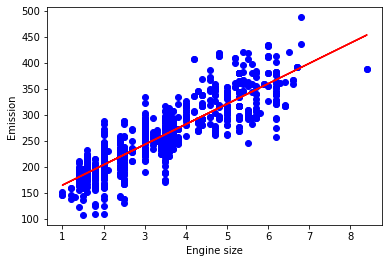

In [0]:
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')
plt.plot(X_train, lm.coef_[0][0]*X_train + lm.intercept_[0], '-r') #'-r' means red
plt.xlabel("Engine size")
plt.ylabel("Emission")

Alternate method to draw the line of fit is using seaborn plot

(0.0, 506.9)

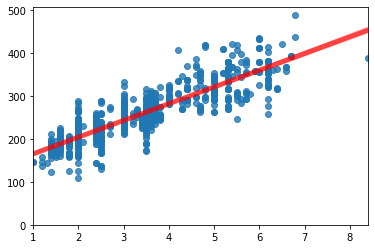

In [0]:
import seaborn as sns
%matplotlib inline 

sns.regplot(x=X_train, y=y_train, data=data, line_kws={"color":"r","alpha":0.7,"lw":5})
#for ploting at origin
plt.ylim(0,)

# Evaluation
Error = actual - received \\

we compare the actual values and predicted values to calculate the accuracy of a regression model. \\
Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: \\
    **- Mean absolute error:** It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. \\
    **- Mean Squared Error (MSE):** Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. \\
    **- Root Mean Squared Error (RMSE).** \\
    **- R-squared** is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. 
    

In [0]:
# original = y_test
# Received = Ynew_test

from sklearn.metrics import r2_score

Ynew_test = lm.predict(X_test)

print("MSE: %.2f" % np.mean((Ynew_test - y_test) ** 2))
print("MAE: %.2f" % np.mean(np.absolute(Ynew_test - y_test)))
print("R2-score: %.2f" % r2_score(Ynew_test, y_test) )

MSE: 985.94
MAE: 24.10
R2-score: 0.68


In [0]:
#Alternate method
from sklearn.metrics import mean_squared_error
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(y_test, Ynew_test)

985.9381692274999

In [0]:
#Outsample data: Unseen data
X_out = np.asanyarray([[224], [421], [194], [321],[107]])

In [0]:
Y_new_out = lm.predict(X_out)
print(Y_new_out)

[[ 8860.71693645]
 [16542.33374516]
 [ 7690.92757471]
 [12643.03587272]
 [ 4298.53842569]]
